## Entrenamiento Perceptrón

Se importan las librerías necesarias

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, random

In [2]:
data_set = pd.read_csv("data.csv")

In [3]:
data_set.head(5)

,x1,x2,label
0,12.882292,10.228199,1
1,12.682271,9.360462,1
2,12.104981,10.580729,1
3,12.473947,10.993459,1
4,11.997386,9.321291,1


In [4]:
data_shape = data_set.shape
print(data_shape)

(200, 3)


In [5]:
data_set.isnull().sum()

x1       0
x2       0
label    0
dtype: int64

*** 
## Normalizando la data

In [6]:
data_set["x1"] = (data_set["x1"]-data_set["x1"].min())/(data_set["x1"].max()-data_set["x1"].min())

In [7]:
data_set["x2"] = (data_set["x2"]-data_set["x2"].min())/(data_set["x2"].max()-data_set["x2"].min())

In [8]:
data_set.head(5)

,x1,x2,label
0,0.783695,0.804565,1
1,0.767705,0.683183,1
2,0.721553,0.853878,1
3,0.751050,0.911612,1
4,0.712952,0.677704,1


***
## Función gráfica

In [9]:
#Gŕaficas
def grafica(x, y, w):
    #resultado = w[0] + x["x1"]*w[1] + x["x2"]*w[2]
    plt.scatter(x["x1"], x["x2"], c = "r", alpha = 0.5)
    plt.title("Datos con w = "+str(w))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot([0, -(w[0])/w[2]], [-(w[0])/w[1], 0], linestyle = '-', marker='o')
    plt.show()
    return

***
## Función de entrenamiento

In [10]:
#Funcion de entrenamiento
def random_number(x, w, label, lr):
    dot = 0
    r = random.randrange(0, 199)
    evaluar = label[r]
    dot = np.matmul(x[r], w)
    if ((evaluar == 1) & (dot < 0)):
        w = w + lr*x[r]
    elif ((evaluar == 0) & (dot >= 0)):
        w = w - lr*x[r]
    return w

In [11]:
def perceptron_train(data, learning_rate):
    w = np.random.normal(0, 0.1, size = (3,))
    # Separando entradas de las salidas
    y = data["label"]
    x = data[["x1", "x2"]]
    # Agregando columna de unos
    x.insert(0, "Ones", 1)
    while True:
        w = random_number(x.values, w, y.values, learning_rate)
        y_hat = (np.matmul(x.values, w) >=0).astype(int)
        if np.all(y_hat == y.values):
            break
    grafica(x, y, w)
    return w

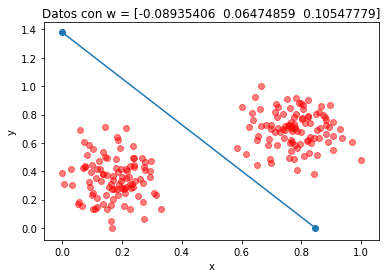

[-0.08935406  0.06474859  0.10547779]


In [13]:
w = perceptron_train(data_set, 0.001)
print("============")
print(w)
print("============")

***
## Comparando labels

In [14]:
data_set["label"].values

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1])

In [15]:
resultado = w[0] + data_set["x1"]*w[1] + data_set["x2"]*w[2]

In [17]:
(resultado >=0).astype(int) == data_set["label"].values

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
170    True
171    True
172    True
173    True
174    True
175    True
176    True
177    True
178    True
179    True
180    True
181    True
182    True
183    True
184    True
185    True
186    True
187    True
188    True
189    True
190    True
191    True
192    True
193    True
194    True
195    True
196    True
197    True
198    True
199    True
Length: 200, dtype: bool